# DXF Testing

Firstly I wanted to use matplot lib in order to ensure that the points which were coming from the dxf_loader.py's load_dxf method were actually accurate


In [29]:
import matplotlib.pyplot as plt
import dxf_loader
import numpy as np


In [30]:
#loading one of the sample dxf files with the aforementioned method
shape_points =  dxf_loader.load_dxf('samples/dxf/Square-Circle.dxf')
#Checking to make sure there's 5 seperate entities as intended
print(len(shape_points))


is my debugging printing?
CIRCLE(#10000057)

circ appended
LINE(#1000005B)

(0.0, 0.0, 1.0)
LINE(#1000005F)

(0.0, 0.0, 1.0)
LINE(#10000063)

(0.0, 0.0, 1.0)
LINE(#10000067)

(0.0, 0.0, 1.0)
5


In [31]:
print(shape_points[1:5])

[array([[-1.75,  1.75],
       [-1.75, -1.75]]), array([[-1.75,  1.75],
       [ 1.75,  1.75]]), array([[ 1.75,  1.75],
       [-1.75,  1.75]]), array([[-1.75, -1.75],
       [-1.75,  1.75]])]


In [32]:
'''for shape in shape_points:
	plt.plot(shape[:, 0], shape[:, 1])
	print(shape.shape)
plt.axis('equal')
plt.show()'''

"for shape in shape_points:\n\tplt.plot(shape[:, 0], shape[:, 1])\n\tprint(shape.shape)\nplt.axis('equal')\nplt.show()"

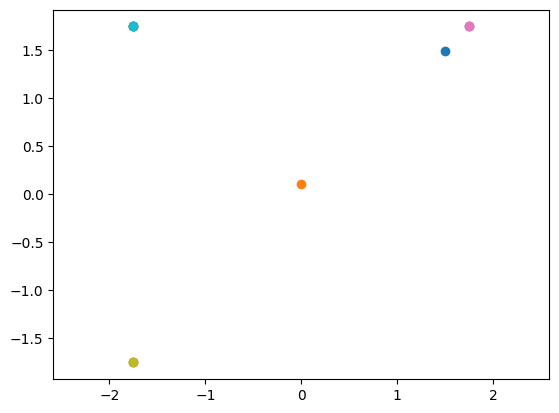

In [33]:
for shape in shape_points:
	for point in shape:
		if type(point[1]) != np.float64:
			print('removed')
			continue
		#print(point[1])
		#print(type(point[1]))

		plt.plot(point[0], point[1],'o-')
	#print(shape.shape)
plt.axis('equal')
plt.show()

Ok so I recently had a discussion with Patrick about the dxf loading and he mentioned the fact that this part of the code was actually already mostly functional 

### Goals for the project as of now 7/16/25
- Be aple to plot a trace of which paths the manipulator has already moved or where it's going. "Mark Trace" button so it's marking where it's tracing in real-time
- Animation of plot
- Panning Feature(which might potentially involve replacing Matplotlib with a more GUI-friendly solution)
- Numbered Points

Before I write anything I think it's important to understnad how this part of the original Mini-MBE library actually worked:


Also, after a bit of trouble-shooting(look at the graph above), I've come to realize that for some reason while loading the dxf there are two specific lines which aren't even correctly being loaded in a regular square and I'm not exactly sure why. I think I'm going to add another dxf with like a decagon or something and see what happens there.
- For processing lines it breaks each of the lines into smaller parts with each one having a lenght equal to the resolution and a Similar thing for CIRCLE points
- Gets scale or just forces millimeters


In [34]:
dec_dxf = dxf_loader.load_dxf('samples/dxf/decagon_dxf_test.dxf')



is my debugging printing?
LINE(#10000057)

(0.0, 0.0, 1.0)
LINE(#1000005B)

(0.0, 0.0, 1.0)
LINE(#1000005F)

(0.0, 0.0, 1.0)
LINE(#10000063)

(0.0, 0.0, 1.0)
LINE(#10000067)

(0.0, 0.0, 1.0)
LINE(#1000006B)

(0.0, 0.0, 1.0)
LINE(#1000006F)

(0.0, 0.0, 1.0)
LINE(#10000073)

(0.0, 0.0, 1.0)
LINE(#10000077)

(0.0, 0.0, 1.0)
LINE(#1000007B)

(0.0, 0.0, 1.0)


20


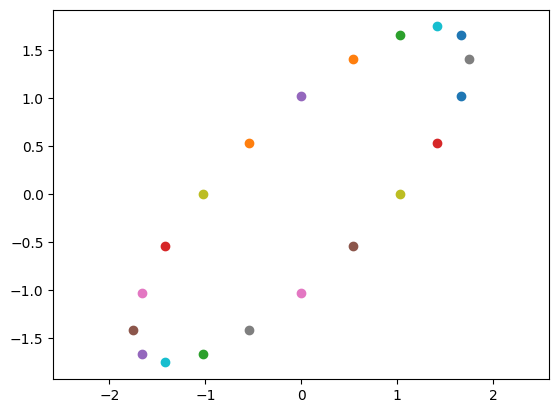

In [35]:
coun = 0
for shape in dec_dxf:
	for point in shape:
		#if type(point[1]) != np.float64:
			#print('removed')
			#continue
		#print(point[1])
		#print(type(point[1]))
		coun+=1
		
		plt.plot(round(point[0],3), round(point[1],3),'o-')
	#print(shape.shape)
print(coun)
plt.axis('equal')
plt.show()

(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)


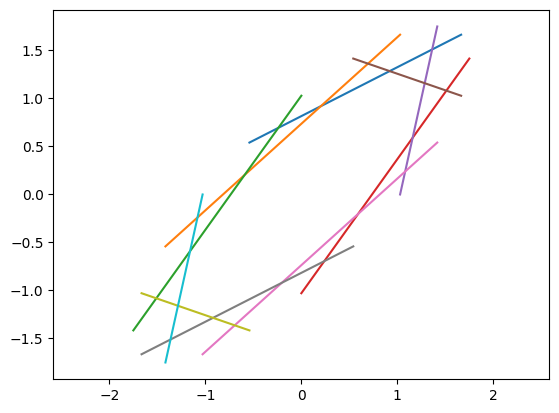

In [36]:
for shape in dec_dxf:
	plt.plot(shape[:, 0], shape[:, 1])
	print(shape.shape)
plt.axis('equal')
plt.show()

In [37]:
dec_dxf_2 = dxf_loader.load_dxf('samples/dxf/decagon_dxf_2.dxf')


is my debugging printing?
LINE(#10000057)

(0.0, 0.0, 1.0)
LINE(#1000005B)

(0.0, 0.0, 1.0)
LINE(#1000005F)

(0.0, 0.0, 1.0)
LINE(#10000063)

(0.0, 0.0, 1.0)
LINE(#10000067)

(0.0, 0.0, 1.0)
LINE(#1000006B)

(0.0, 0.0, 1.0)
LINE(#1000006F)

(0.0, 0.0, 1.0)
LINE(#10000073)

(0.0, 0.0, 1.0)
LINE(#10000077)

(0.0, 0.0, 1.0)
LINE(#1000007B)

(0.0, 0.0, 1.0)


So the next main issue that I believe this could be coming from is ezdxf's multiple different coordinate systems. It seems most points for things like this are returned as OCS coordinates instead of say WCS or UCS coordinates which could account for this slightly tilted looking nature of the image. I'm going to try graphing this but after converting all of these 

[1.6643489 1.6643489]
[-0.54077974  0.54077974]
[1.02862419 1.6643489 ]
[-1.41577974 -0.54077974]
[-4.00000000e-16  1.02862419e+00]
[-1.75       -1.41577974]
[ 5.00000000e-16 -1.02862419e+00]
[1.75       1.41577974]
[1.02862419 0.        ]
[1.41577974 1.75      ]
[1.6643489  1.02862419]
[0.54077974 1.41577974]
[-1.02862419 -1.6643489 ]
[1.41577974 0.54077974]
[-1.6643489 -1.6643489]
[ 0.54077974 -0.54077974]
[-1.6643489  -1.02862419]
[-0.54077974 -1.41577974]
[-1.02862419e+00 -2.00000000e-16]
[-1.41577974 -1.75      ]


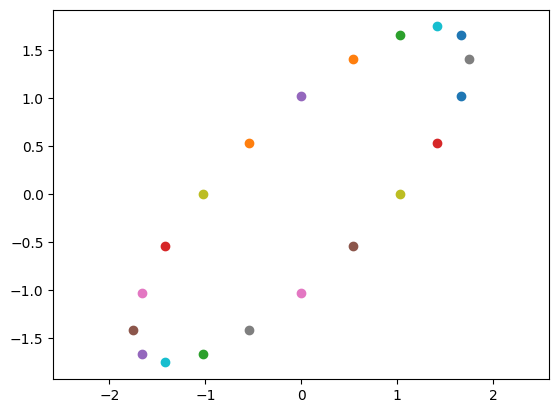

In [38]:
import ezdxf.math
for shape in dec_dxf_2:
	for point in shape:
		print(point)
		plt.plot(point[0], point[1],'o-')
plt.axis('equal')
plt.show()

In [39]:
from plotly.offline import iplot

import plotly.graph_objs as go

fig = go.Figure()

for shape in dec_dxf:
    fig.add_trace(go.Scatter(
        x=shape[0], y=shape[1],
        mode='lines+markers'
    ))

fig.update_layout(
    title="dec_dxf Plot with Plotly",
    xaxis_title="X",
    yaxis_title="Y",
    yaxis_scaleanchor="x",
    showlegend=False
)

iplot(fig)

Ok given how plotly just seems to be kinda nailing it right now(on the first try), and already comes with features like panning, I think it might just be the wiser choice to immediately switch to plotly and just get the code runing on plotly

In [40]:
def get_plotly_graph_from_dxf(path):
    dxf_loaded = dxf_loader.load_dxf(path)
    fig = go.Figure()

    for shape in dxf_loaded:
        print(f'{shape[0]}\n{shape[1]}\n\n')#debug
        fig.add_trace(go.Scatter(
            
            x=shape[0], y=shape[1],
            mode='lines+markers'
        ))

    fig.update_layout(
        title="dec_dxf Plot with Plotly",
        xaxis_title="X",
        yaxis_title="Y",
        yaxis_scaleanchor="x",
        showlegend=False
    )

    iplot(fig)

In [41]:
get_plotly_graph_from_dxf('samples\dxf\Square-Circle.dxf')


is my debugging printing?
CIRCLE(#10000057)

circ appended
LINE(#1000005B)

(0.0, 0.0, 1.0)
LINE(#1000005F)

(0.0, 0.0, 1.0)
LINE(#10000063)

(0.0, 0.0, 1.0)
LINE(#10000067)

(0.0, 0.0, 1.0)
[ 1.5         1.49626354  1.48507277  1.46648344  1.44058816  1.40751595
  1.36743156  1.32053469  1.26705899  1.20727087  1.14146818  1.06997876
  0.99315875  0.91139088  0.82508251  0.73466361  0.64058466  0.54331435
  0.44333727  0.34115151  0.23726615  0.13219874  0.02647272 -0.07938518
 -0.18484759 -0.2893891  -0.39248888 -0.49363331 -0.59231848 -0.68805275
 -0.78035917 -0.86877789 -0.95286839 -1.03221176 -1.1064127  -1.17510154
 -1.23793609 -1.2946033  -1.34482087 -1.3883386  -1.4249397  -1.45444182
 -1.47669799 -1.49159732 -1.49906559 -1.49906559 -1.49159732 -1.47669799
 -1.45444182 -1.4249397  -1.3883386  -1.34482087 -1.2946033  -1.23793609
 -1.17510154 -1.1064127  -1.03221176 -0.95286839 -0.86877789 -0.78035917
 -0.68805275 -0.59231848 -0.49363331 -0.39248888 -0.2893891  -0.18484759
 -0.07

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\ndian\AppData\Local\Temp\ipykernel_27004\341196303.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [42]:
get_plotly_graph_from_dxf('samples/dxf/circle.dxf')

is my debugging printing?
CIRCLE(#10000057)

circ appended
[ 2.17560884  2.17018946  2.15395829  2.12699622  2.08943756  2.04146943
  1.98333079  1.91531131  1.83774983  1.75103279  1.65559218  1.5519035
  1.44048331  1.32188671  1.19670453  1.06556043  0.92910777  0.78802633
  0.64301899  0.49480816  0.34413222  0.19174183  0.03839619 -0.11514073
 -0.26810403 -0.41973165 -0.56926819 -0.71596866 -0.85910221 -0.99795576
 -1.13183755 -1.26008057 -1.38204594 -1.49712602 -1.6047475  -1.7043742
 -1.7955098  -1.87770026 -1.95053611 -2.01365449 -2.06674094 -2.109531
 -2.14181147 -2.16342155 -2.17425357 -2.17425357 -2.16342155 -2.14181147
 -2.109531   -2.06674094 -2.01365449 -1.95053611 -1.87770026 -1.7955098
 -1.7043742  -1.6047475  -1.49712602 -1.38204594 -1.26008057 -1.13183755
 -0.99795576 -0.85910221 -0.71596866 -0.56926819 -0.41973165 -0.26810403
 -0.11514073  0.03839619  0.19174183  0.34413222  0.49480816  0.64301899
  0.78802633  0.92910777  1.06556043  1.19670453  1.32188671  1.440483

In [43]:
dxf_loader.load_dxf('samples/dxf/circle.dxf')

is my debugging printing?
CIRCLE(#10000057)

circ appended


[[array([ 2.17560884,  2.17018946,  2.15395829,  2.12699622,  2.08943756,
          2.04146943,  1.98333079,  1.91531131,  1.83774983,  1.75103279,
          1.65559218,  1.5519035 ,  1.44048331,  1.32188671,  1.19670453,
          1.06556043,  0.92910777,  0.78802633,  0.64301899,  0.49480816,
          0.34413222,  0.19174183,  0.03839619, -0.11514073, -0.26810403,
         -0.41973165, -0.56926819, -0.71596866, -0.85910221, -0.99795576,
         -1.13183755, -1.26008057, -1.38204594, -1.49712602, -1.6047475 ,
         -1.7043742 , -1.7955098 , -1.87770026, -1.95053611, -2.01365449,
         -2.06674094, -2.109531  , -2.14181147, -2.16342155, -2.17425357,
         -2.17425357, -2.16342155, -2.14181147, -2.109531  , -2.06674094,
         -2.01365449, -1.95053611, -1.87770026, -1.7955098 , -1.7043742 ,
         -1.6047475 , -1.49712602, -1.38204594, -1.26008057, -1.13183755,
         -0.99795576, -0.85910221, -0.71596866, -0.56926819, -0.41973165,
         -0.26810403, -0.11514073,  0.